## Занятие 11. Нелинейные модели для регрессии. Выбор лучшего алгоритма машинного обучения. Создание пайплайна (программного конвеера)

In [1]:
import os
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

### k-Nearest Neighbors

In [3]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)

In [4]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

In [5]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

In [6]:
scoring = 'neg_mean_squared_error'

In [7]:
# KNN Regression
model = KNeighborsRegressor()
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-38.852320266666666


### Classification and Regression Trees

In [8]:
# Decision Tree Regression
model = DecisionTreeRegressor()
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-23.00532666666667


### Support Vector Machines

In [9]:
# SVM Regression
model = SVR(gamma='auto')
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-83.73272794073159


## Выбор лучшего алгоритма машинного обучения

In [10]:
# prepare models
models = []
models.append(('LinRegr', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTree', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

In [11]:
# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinRegr: -23.746502 (11.143430)
Ridge: -23.889890 (11.407334)
Lasso: -28.745890 (12.001845)
ElasticNet: -27.908420 (11.484450)
KNN: -38.852320 (14.660693)
DTree: -21.002553 (9.645938)
SVM: -67.641407 (26.524655)


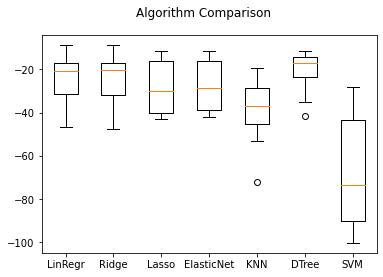

In [12]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Создание пайплайна (программного конвеера)

### Программный конвеер для подготовки данных и моделирования

In [13]:
# Create a pipeline that standardizes the data then creates a model
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('DTree', DecisionTreeRegressor()))
model = Pipeline(estimators)

In [14]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-21.008751372549018


### Программный конвеер для отбора признаков и моделирования

In [15]:
# Create a pipeline that extracts features from the data then creates a model
# create feature union
features = []
features.append(('pca', PCA(n_components=4)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

In [16]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('LinRegr', LinearRegression()))
model = Pipeline(estimators)

In [17]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print(results.mean())

-29.052082888797162
